In [2]:
# 모듈 불러오기
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  
%matplotlib inline
import seaborn as sns


import warnings
import pandas as pd
import numpy as np
from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go

import missingno as msno
from wordcloud import WordCloud

# 폰트조절

from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)  

# 데이터 불러오기
gender_submission  = pd.read_csv('data/gender_submission.csv')
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

<!-- PassengerId	id
Survived	생존 여부 (0 = 사망, 1 = 생존)
Pclass	티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
name	이름
Sex	성별
Age	나이
SibSp	함께 탑승한 자녀 , 배우자 의 수
Parch	함께 탑승한 부모님 , 아이들 의 수
Fare	요금
Ticket	티켓 번호
Cabin	수하물 번호
Embarked	선착장 -->

<AxesSubplot:>

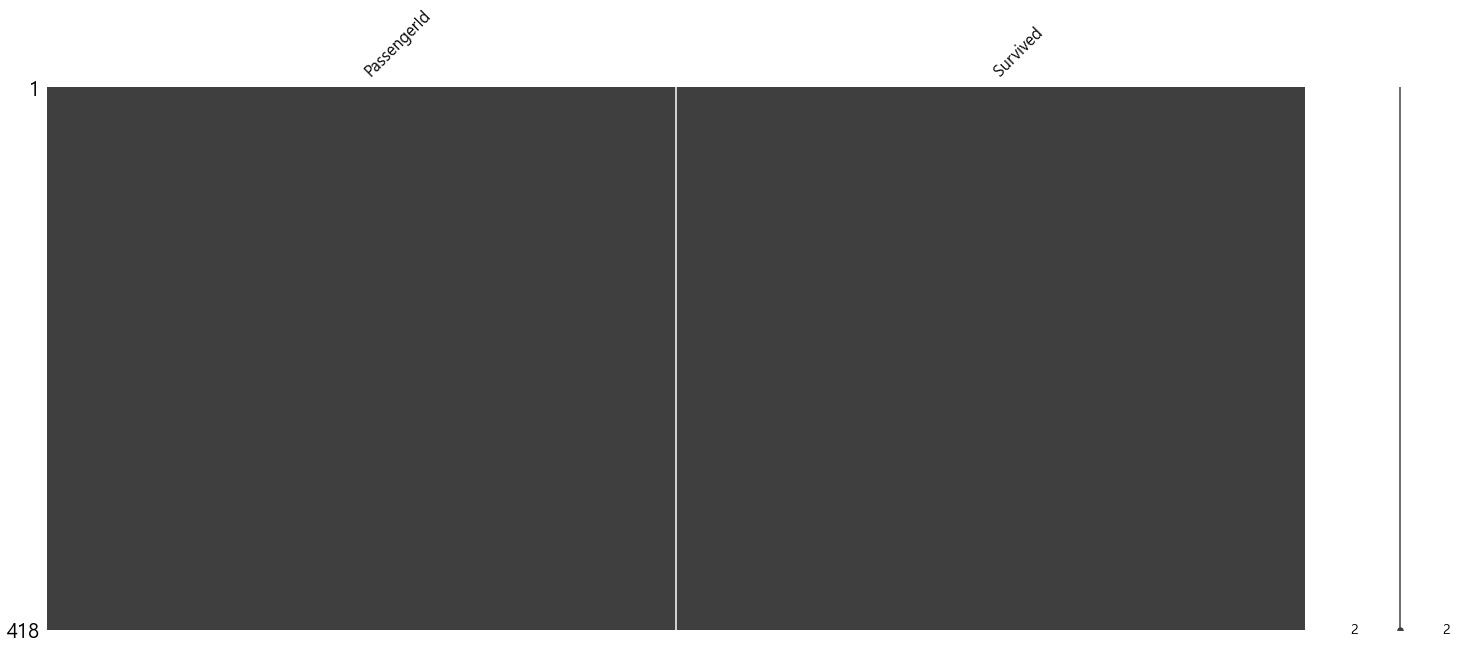

In [3]:
msno.matrix(gender_submission)

<AxesSubplot:>

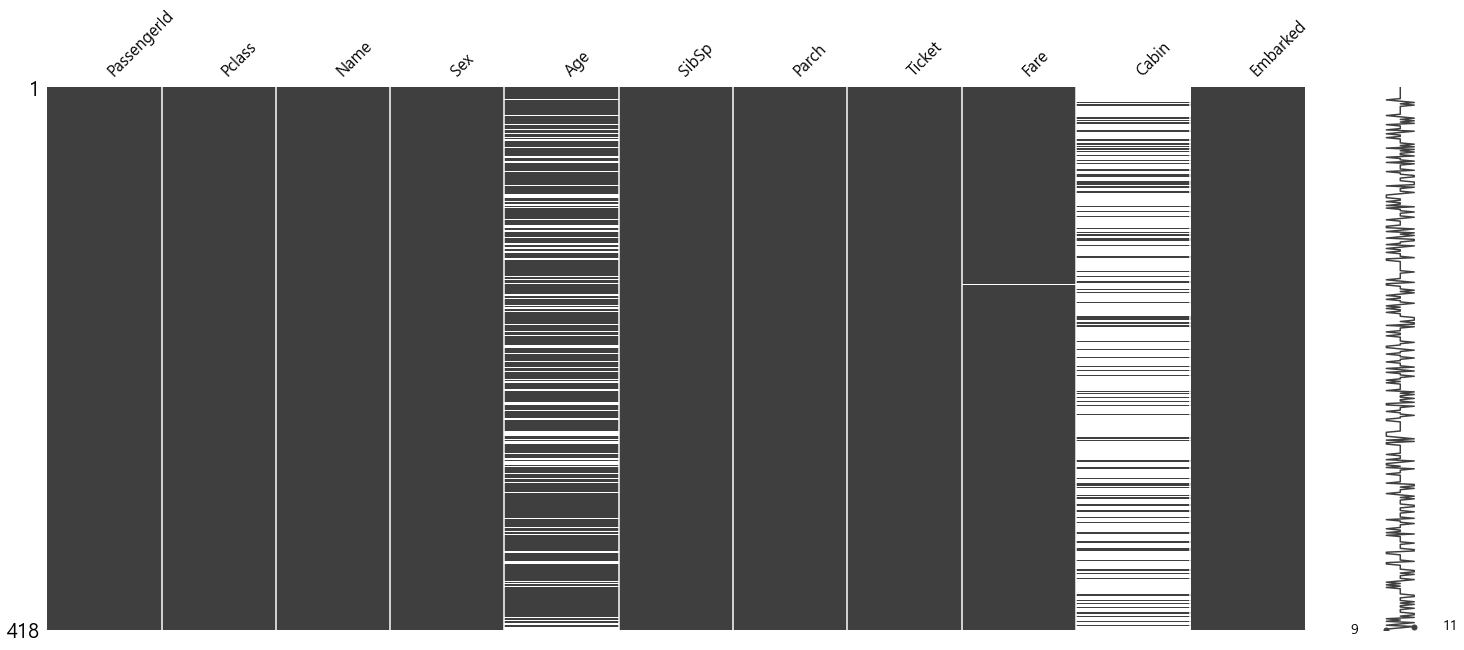

In [4]:
msno.matrix(test)

In [5]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
test=test[test["Fare"].notna()]

In [7]:
test['Age']=test['Age'].fillna('NaN', axis=0)

In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [9]:
test['Cabin']=test['Cabin'].fillna('Un',axis=0)

In [10]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
test.nunique()

PassengerId    417
Pclass           3
Name           417
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         362
Fare           169
Cabin           77
Embarked         3
dtype: int64

In [12]:
fe_name = list(test)
df_train = train[fe_name]
df = pd.concat((df_train,test))

In [13]:
print(train.shape, test.shape, df.shape)

(891, 12) (417, 11) (1308, 11)


In [14]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,Un,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Un,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,Un,S


In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [16]:
target = train['Survived']

In [19]:
def stack_plot(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar', stacked= True, figsize = (10,5))

([<matplotlib.patches.Wedge at 0x1ac7871ec40>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'dead')],
 [Text(-0.21413178278152267, 0.5604886971231505, '62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38%')])

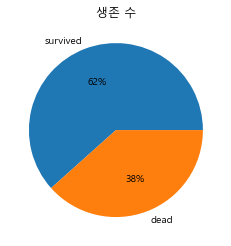

In [20]:
lable = ['survived','dead']
plt.title('생존 수')
plt.pie(train['Survived'].value_counts(),labels= lable,autopct='%.f%%')

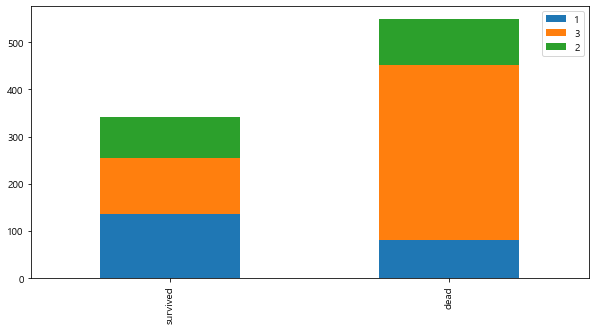

In [21]:
stack_plot('Pclass')

### 원핫 인코딩

In [24]:
Pclass_encoded = pd.get_dummies(df['Pclass'],prefix= 'Pclass')
df = pd.concat((df,Pclass_encoded), axis=1)
df = df.drop(columns = 'Pclass')

### sex

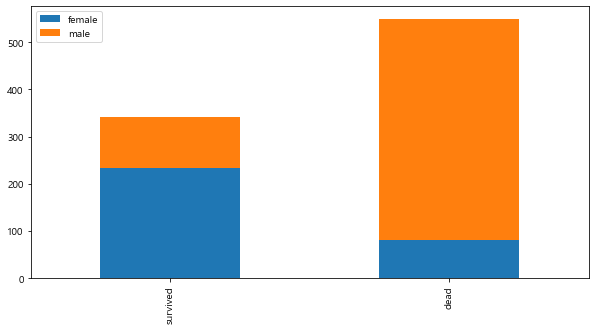

In [25]:
stack_plot('Sex')

In [26]:
sex_encoded = pd.get_dummies(df['Sex'],prefix= 'Sex')
df = pd.concat((df,sex_encoded), axis=1)
df = df.drop(columns = 'Sex')

In [27]:
df.drop('Sex_female', axis=1, inplace=True)

### SibSp

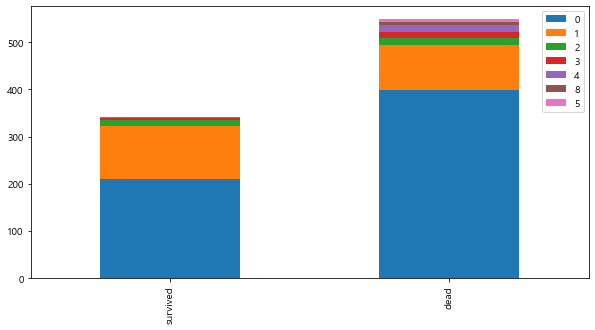

In [28]:
stack_plot('SibSp')

### Parch

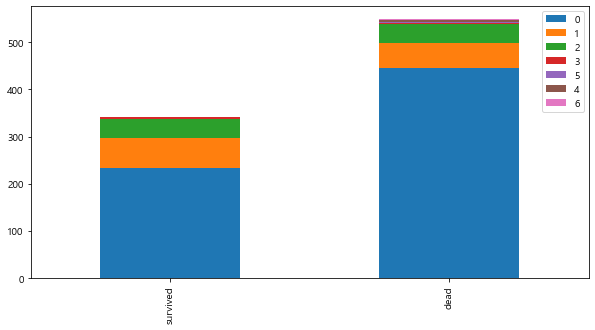

In [29]:
stack_plot('Parch')

In [63]:
df['Travelpeople']=df["SibSp"]+df["Parch"]
df['TravelAlone']=np.where(df['Travelpeople']>0, 0, 1)

In [64]:
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)

In [65]:
df.drop('Travelpeople', axis=1, inplace=True)

### name

In [30]:
df['New_name']  = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train['New_name']  = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [31]:
train ['New_name'] =  train['New_name'].map({"Mr": 0 , "Mrs":2, "Miss":1,"Dr":3,"Rev":3,
                                             "Mlle":3,"Major":3,"Col":3,"Ms":3,"Jonkheer":3,
                                             "Sir" :3,"Lady":3,"Mme":3,"Capt":3,"Don":3,"Countess":3})
df['New_name'] =  df['New_name'].map({"Mr": 0 , "Mrs":2, "Miss":1,"Dr":3,"Rev":3,
                                             "Mlle":3,"Major":3,"Col":3,"Ms":3,"Jonkheer":3,
                                             "Sir" :3,"Lady":3,"Mme":3,"Capt":3,"Don":3,"Countess":3})

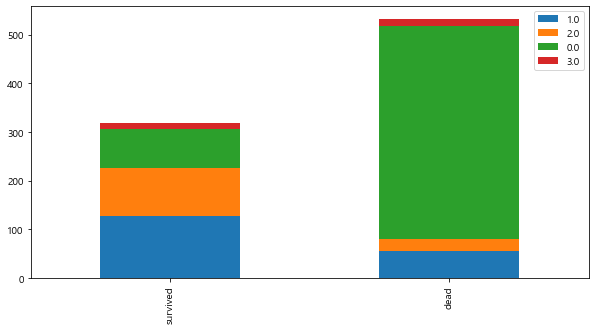

In [32]:
stack_plot('New_name')

In [33]:
df['New_name'] = df['New_name'].fillna('0')

In [34]:
df = df.astype({'New_name':'float'})

In [35]:
df = df.drop(columns = 'Name')

In [36]:
New_name_encoded = pd.get_dummies(df['New_name'],prefix= 'New_name')
df = pd.concat((df,New_name_encoded), axis=1)
df = df.drop(columns = 'New_name')

### age

In [38]:
df = df.astype({'Age':'float'})

<AxesSubplot:>

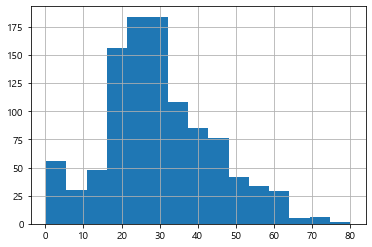

In [39]:
df['Age'].hist(bins = 15)

In [41]:
df['Age'].fillna(28, inplace = True)

### Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

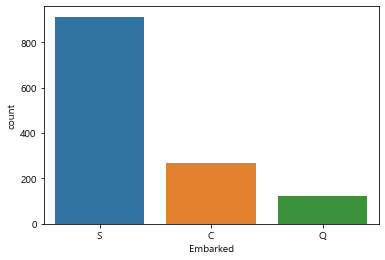

In [42]:
sns.countplot(x= 'Embarked', data= df)

In [43]:
df['Embarked'].fillna('S',inplace=True)

In [44]:
Embarked_encoded = pd.get_dummies(df['Embarked'],prefix= 'Embarked')
df = pd.concat((df,Embarked_encoded), axis=1)
df = df.drop(columns = 'Embarked')

In [45]:
from scipy.stats import norm

c:\Users\tiamo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

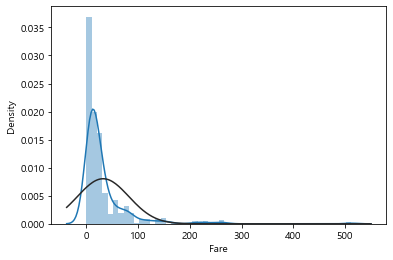

In [46]:
sns.distplot(train['Fare'],fit = norm)

### 비대칭 분포 멱변환

In [47]:
df['Fare'] = df['Fare'].map(lambda i : np.log(i) if i >0 else 0)

c:\Users\tiamo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

c:\Users\tiamo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


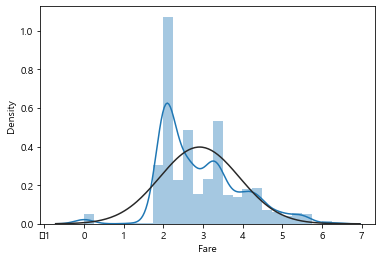

In [48]:
sns.distplot(df['Fare'],fit = norm)

### Cabin

In [49]:
df['Cabin'].value_counts()

Un                 326
C23 C25 C27          6
G6                   5
B57 B59 B63 B66      5
F2                   4
                  ... 
A14                  1
E63                  1
E12                  1
E38                  1
C105                 1
Name: Cabin, Length: 187, dtype: int64

In [50]:
df = df.drop(columns = 'Cabin')

In [51]:
df = df.drop(['PassengerId','Ticket'],axis = 1)

In [52]:
df.isnull().sum()

Age             0
SibSp           0
Parch           0
Fare            0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Sex_male        0
New_name_0.0    0
New_name_1.0    0
New_name_2.0    0
New_name_3.0    0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [55]:
df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,New_name_0.0,New_name_1.0,New_name_2.0,New_name_3.0,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,1.981001,0,0,1,1,1,0,0,0,0,0,1
1,38.0,1,0,4.266662,1,0,0,0,0,0,1,0,1,0,0
2,26.0,0,0,2.070022,0,0,1,0,0,1,0,0,0,0,1
3,35.0,1,0,3.972177,1,0,0,0,0,0,1,0,0,0,1
4,35.0,0,0,2.085672,0,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,2.085672,0,0,1,1,1,0,0,0,0,0,1
414,39.0,0,0,4.690430,1,0,0,0,1,0,0,0,1,0,0
415,38.5,0,0,1.981001,0,0,1,1,1,0,0,0,0,0,1
416,28.0,0,0,2.085672,0,0,1,1,1,0,0,0,0,0,1


In [59]:
df[:train.shape[0]]

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,New_name_0.0,New_name_1.0,New_name_2.0,New_name_3.0,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,1.981001,0,0,1,1,1,0,0,0,0,0,1
1,38.0,1,0,4.266662,1,0,0,0,0,0,1,0,1,0,0
2,26.0,0,0,2.070022,0,0,1,0,0,1,0,0,0,0,1
3,35.0,1,0,3.972177,1,0,0,0,0,0,1,0,0,0,1
4,35.0,0,0,2.085672,0,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,2.564949,0,1,0,1,0,0,0,1,0,0,1
887,19.0,0,0,3.401197,1,0,0,0,0,1,0,0,0,0,1
888,28.0,1,2,3.154870,0,0,1,0,0,1,0,0,0,0,1
889,26.0,0,0,3.401197,1,0,0,1,1,0,0,0,1,0,0


In [57]:
df[train.shape[0]:]

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,New_name_0.0,New_name_1.0,New_name_2.0,New_name_3.0,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,2.057860,0,0,1,1,1,0,0,0,0,1,0
1,47.0,1,0,1.945910,0,0,1,0,0,0,1,0,0,0,1
2,62.0,0,0,2.270836,0,1,0,1,1,0,0,0,0,1,0
3,27.0,0,0,2.159003,0,0,1,1,1,0,0,0,0,0,1
4,22.0,1,1,2.508582,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,2.085672,0,0,1,1,1,0,0,0,0,0,1
414,39.0,0,0,4.690430,1,0,0,0,1,0,0,0,1,0,0
415,38.5,0,0,1.981001,0,0,1,1,1,0,0,0,0,0,1
416,28.0,0,0,2.085672,0,0,1,1,1,0,0,0,0,0,1


## 모델링

In [67]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [68]:
new_train = df[:train.shape[0]]
new_test = df[train.shape[0]:]

In [69]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S",
      "Sex_male",'New_name_0.0','New_name_1.0', 'New_name_2.0'] 

In [70]:
X = new_train[cols]
Y = train['Survived']

In [71]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.445151
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                           10
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.3315
Time:                        16:07:50   Log-Likelihood:                -396.63
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.393e-78
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0386      0.008     -4.734      0.000      -0.055      -0.023
Fare             0.1720

In [72]:
cols2 = ["Age", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_S",
      "Sex_male",'New_name_1.0', 'New_name_2.0'] 

In [73]:
X2=new_train[cols2]
Y=train['Survived']

logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.446233
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.3299
Time:                        16:08:13   Log-Likelihood:                -397.59
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.611e-80
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0384      0.008     -4.773      0.000      -0.054      -0.023
TravelAlone      0.2767

In [74]:
cols3=["Age", "Pclass_1", "Pclass_2","Embarked_S",
      "Sex_male",'New_name_1.0', 'New_name_2.0'] 

In [75]:
X3=new_train[cols3]
Y=train['Survived']

logit_model=sm.Logit(Y,X3)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447313
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.3283
Time:                        16:08:25   Log-Likelihood:                -398.56
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.944e-81
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0349      0.008     -4.617      0.000      -0.050      -0.020
Pclass_1         2.3477

In [76]:
f_test = new_test[cols3]

### LogisticRegression

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X3, Y)

print("모델 Accuracy : {:.2f}%".format(logreg.score(X3, Y)*100))

모델 Accuracy : 80.36%


c:\Users\tiamo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 랜덤포레스트

In [78]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



X = new_train[cols3]
Y = train['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [79]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=5,
                                n_estimators=100)

clf_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5)

In [80]:
pred_rf = clf_rf.predict(X_test)

clf_rf.score(X_test, Y_test)


rf_train_score = clf_rf.score(X_train, Y_train)
rf_test_score = clf_rf.score(X_test, Y_test)

print(f'랜덤포레스트 훈련 정확도는 {round(rf_train_score,2)} 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {round(rf_test_score,2)} 입니다.')

랜덤포레스트 훈련 정확도는 0.84 입니다.
랜덤포레스트 테스트 정확도는 0.82 입니다.


### x 부스팅


In [81]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
# Total에 대한 분류 모델
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Total 대한 XGClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_std, Y_train)

pred_total_xg = xgbc.predict(X_test_std)

xgbc_total_train_score = xgbc.score(X_train_std, Y_train)
xgbc_total_test_score = xgbc.score(X_test_std, Y_test)

print(f'XGBoost 훈련 정확도는 {int(round(xgbc_total_train_score,2)*100)}% 입니다.')
print(f'XGBOost 테스트 정확도는 {int(round(xgbc_total_test_score,2)*100)}% 입니다.')

XGBoost 훈련 정확도는 91% 입니다.
XGBOost 테스트 정확도는 81% 입니다.


<AxesSubplot:xlabel='cofficient', ylabel='feature_names'>

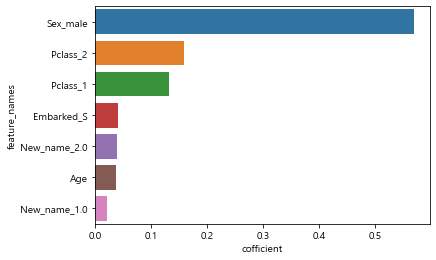

In [82]:
coef_importance = pd.DataFrame({"feature_names" : X_train.columns, "cofficient" : xgbc.feature_importances_}).sort_values(by = 'cofficient', ascending = False)
sns.barplot(data = coef_importance, x = 'cofficient', y = 'feature_names')

In [86]:
# Total의 SVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5)

 # StandardScaler로 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
# SVM 설정
T_svc_model = SVC(kernel = 'rbf', C = 5, gamma = 0.1)
T_svc_model.fit(X_train_std, Y_train)
# 예측값
pred_SVC = T_svc_model.predict(X_test_std)


In [88]:
T_svc_train_score = T_svc_model.score(X_train_std, Y_train.ravel())
T_svc_test_score = T_svc_model.score(X_test_std, Y_test.ravel())

print(f'SVM 훈련 정확도는 {int(round(T_svc_train_score,2)*100)}% 입니다.')
print(f'SVM 테스트 정확도는 {int(round(T_svc_test_score,2)*100)}% 입니다.')

SVM 훈련 정확도는 82% 입니다.
SVM 테스트 정확도는 82% 입니다.
